In [15]:
import matplotlib.pyplot as plt
import numpy as np

Phase portrait: $\dot{x} = \sin{x}$

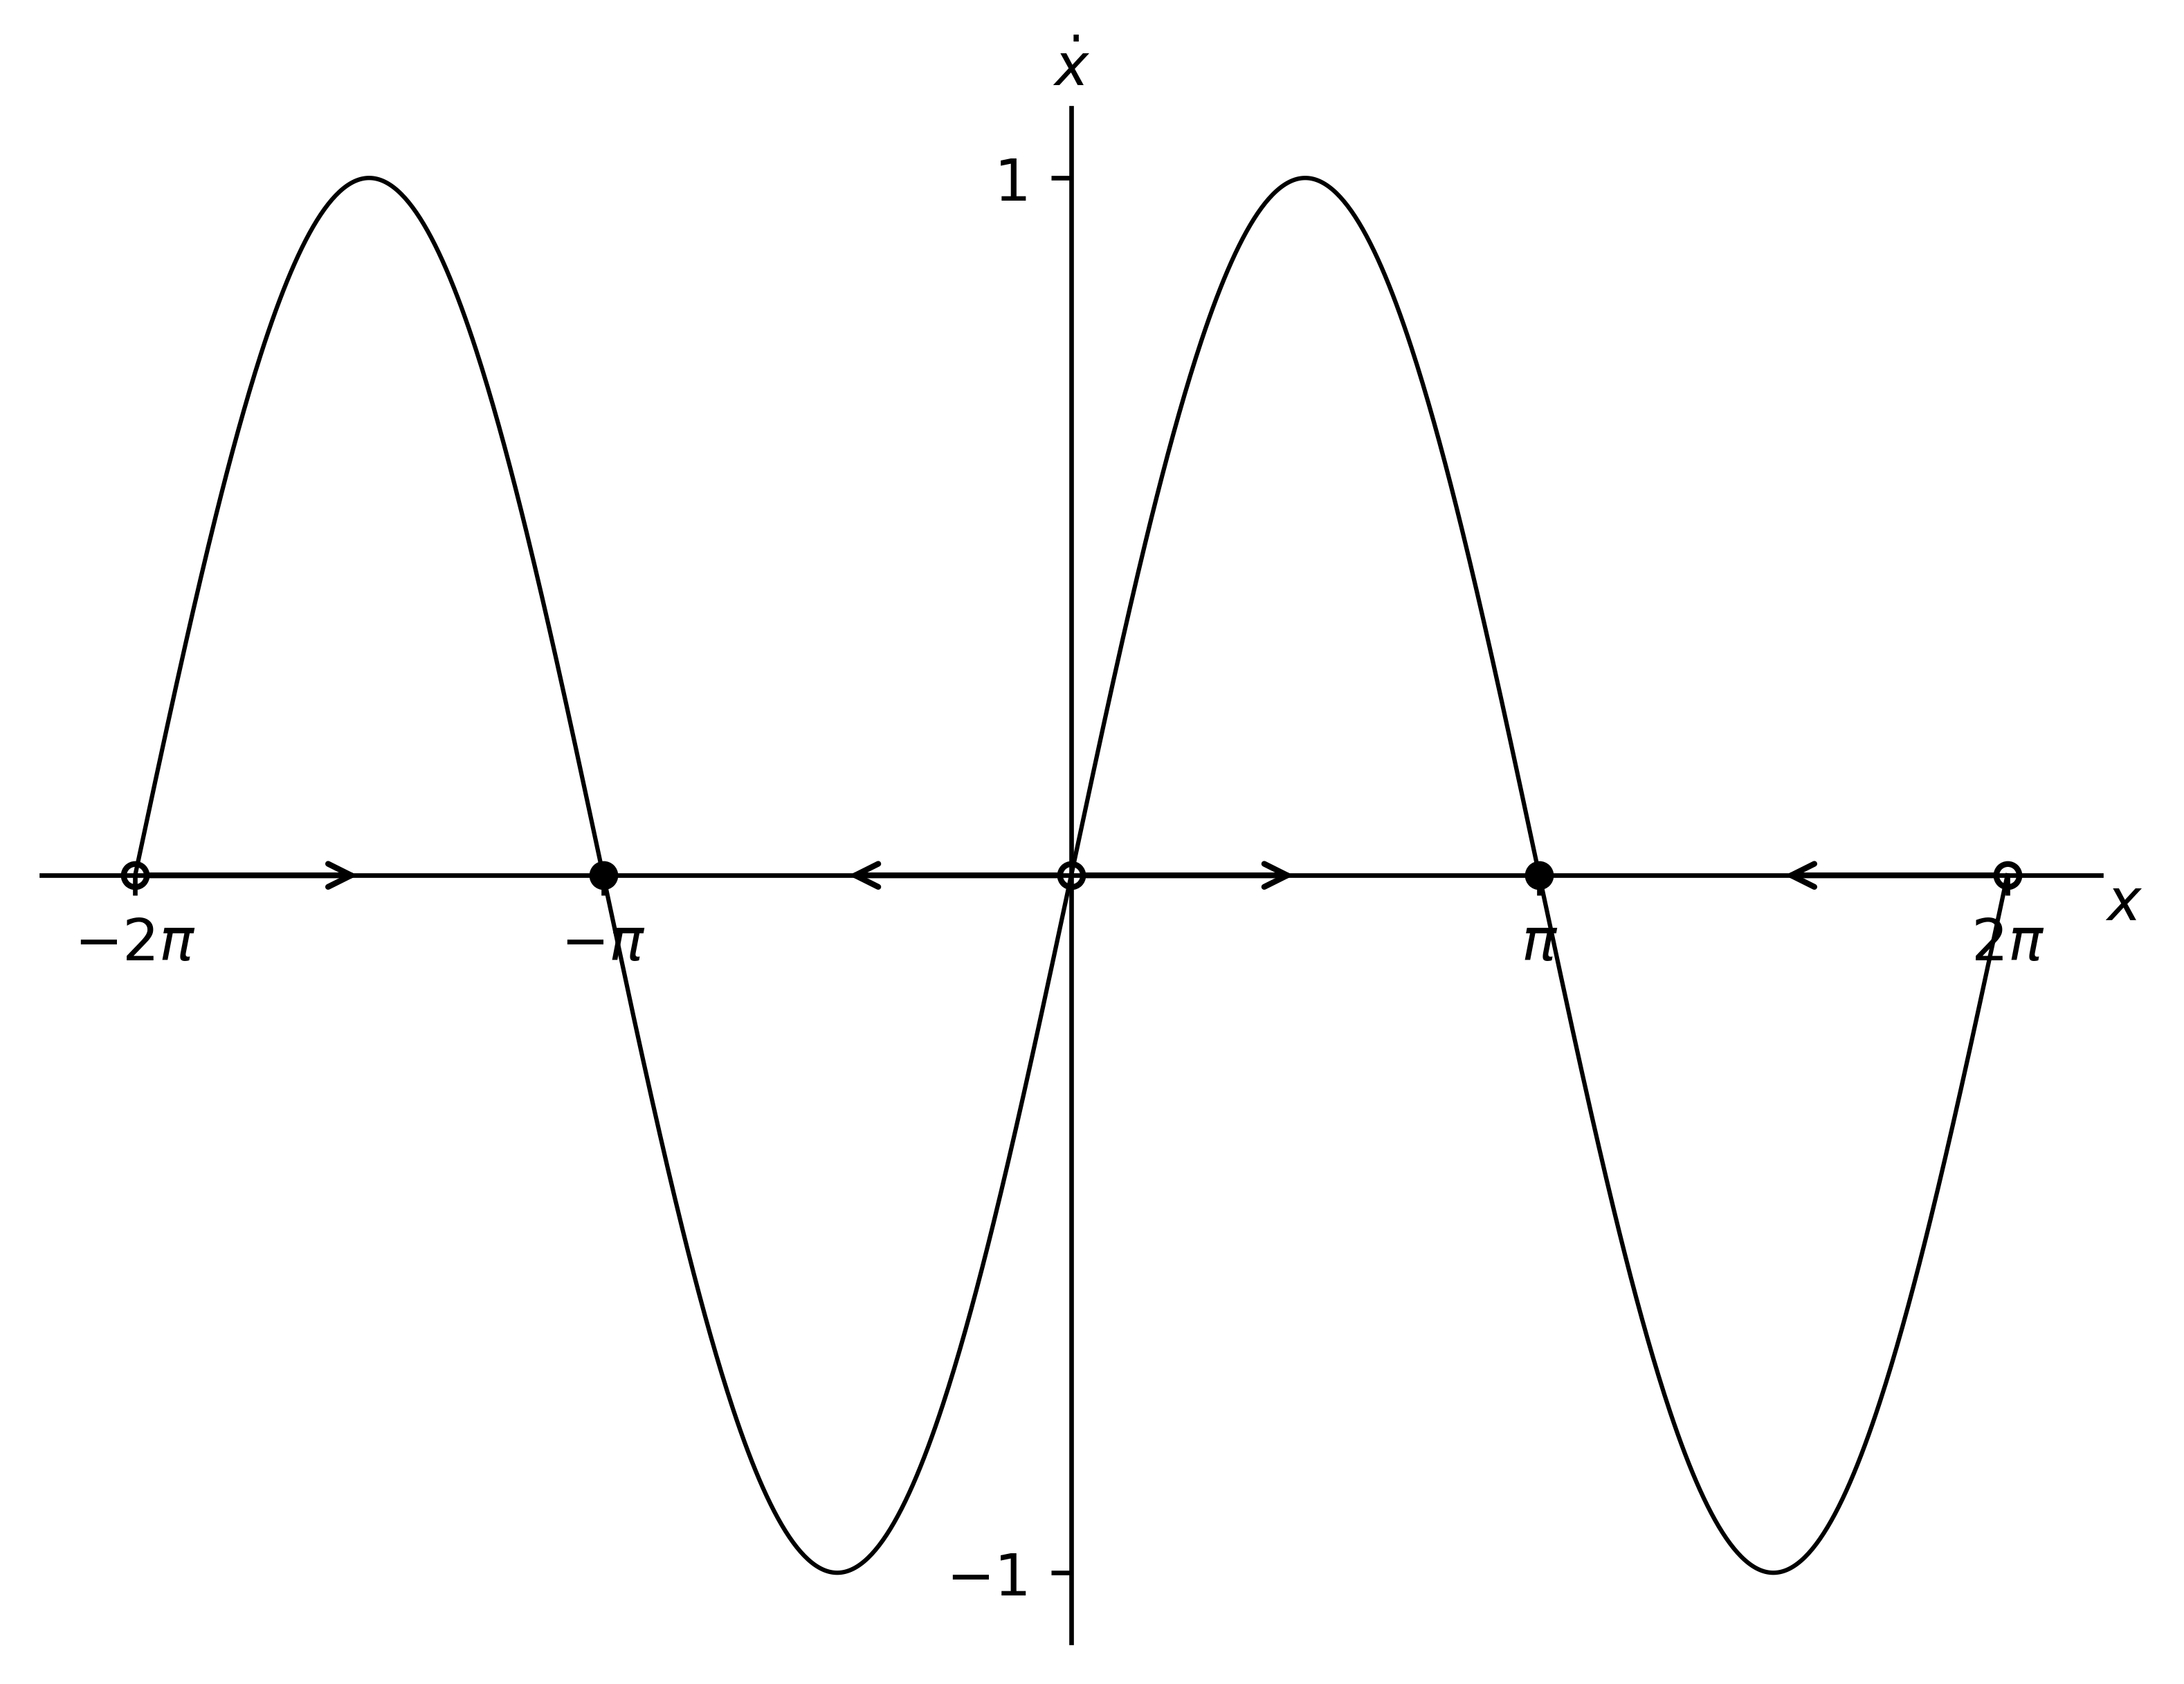

In [16]:
# Plotting the dynamical system
x = np.linspace(-2*np.pi, 2*np.pi, 1000)
x_dot = np.sin(x)
plt.plot(x, x_dot, linewidth=0.75, color='k')
plt.ylabel(r'$x$', rotation=0)



plt.yticks([-1, 1], fontsize=10)
plt.xticks([-2*np.pi, -np.pi, np.pi, 2*np.pi], [r'$-2\pi$', r'$-\pi$', r'$\pi$', r'$2\pi$'], fontsize=10)
plt.xlabel(r'$\dot{x}$', rotation=0, fontsize=10)
# Manipulate figure size
plt.rcParams["figure.figsize"] = (6,2)
plt.rcParams["figure.dpi"] = 600

# Add fixed points
plt.plot([-np.pi, np.pi], [0, 0], 'ko', markersize=4)
plt.plot([-2*np.pi, 0, 2*np.pi], [0, 0, 0], 'ko', markersize=4, fillstyle='none')

# Add arrows:
plt.annotate("", xy=(-1.5*np.pi, 0), xytext=(-2*np.pi, 0), arrowprops=dict(arrowstyle="->", color='k'))
plt.annotate("", xy=(np.pi/2, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='k'))
plt.annotate("", xy=(2*np.pi, 0), xytext=(1.5*np.pi, 0), arrowprops=dict(arrowstyle="<-", color='k'))
plt.annotate("", xy=(0, 0), xytext=(-np.pi/2, 0), arrowprops=dict(arrowstyle="<-", color='k'))

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.xaxis.set_label_position('top')
ax.yaxis.set_label_position('right')




plt.show()

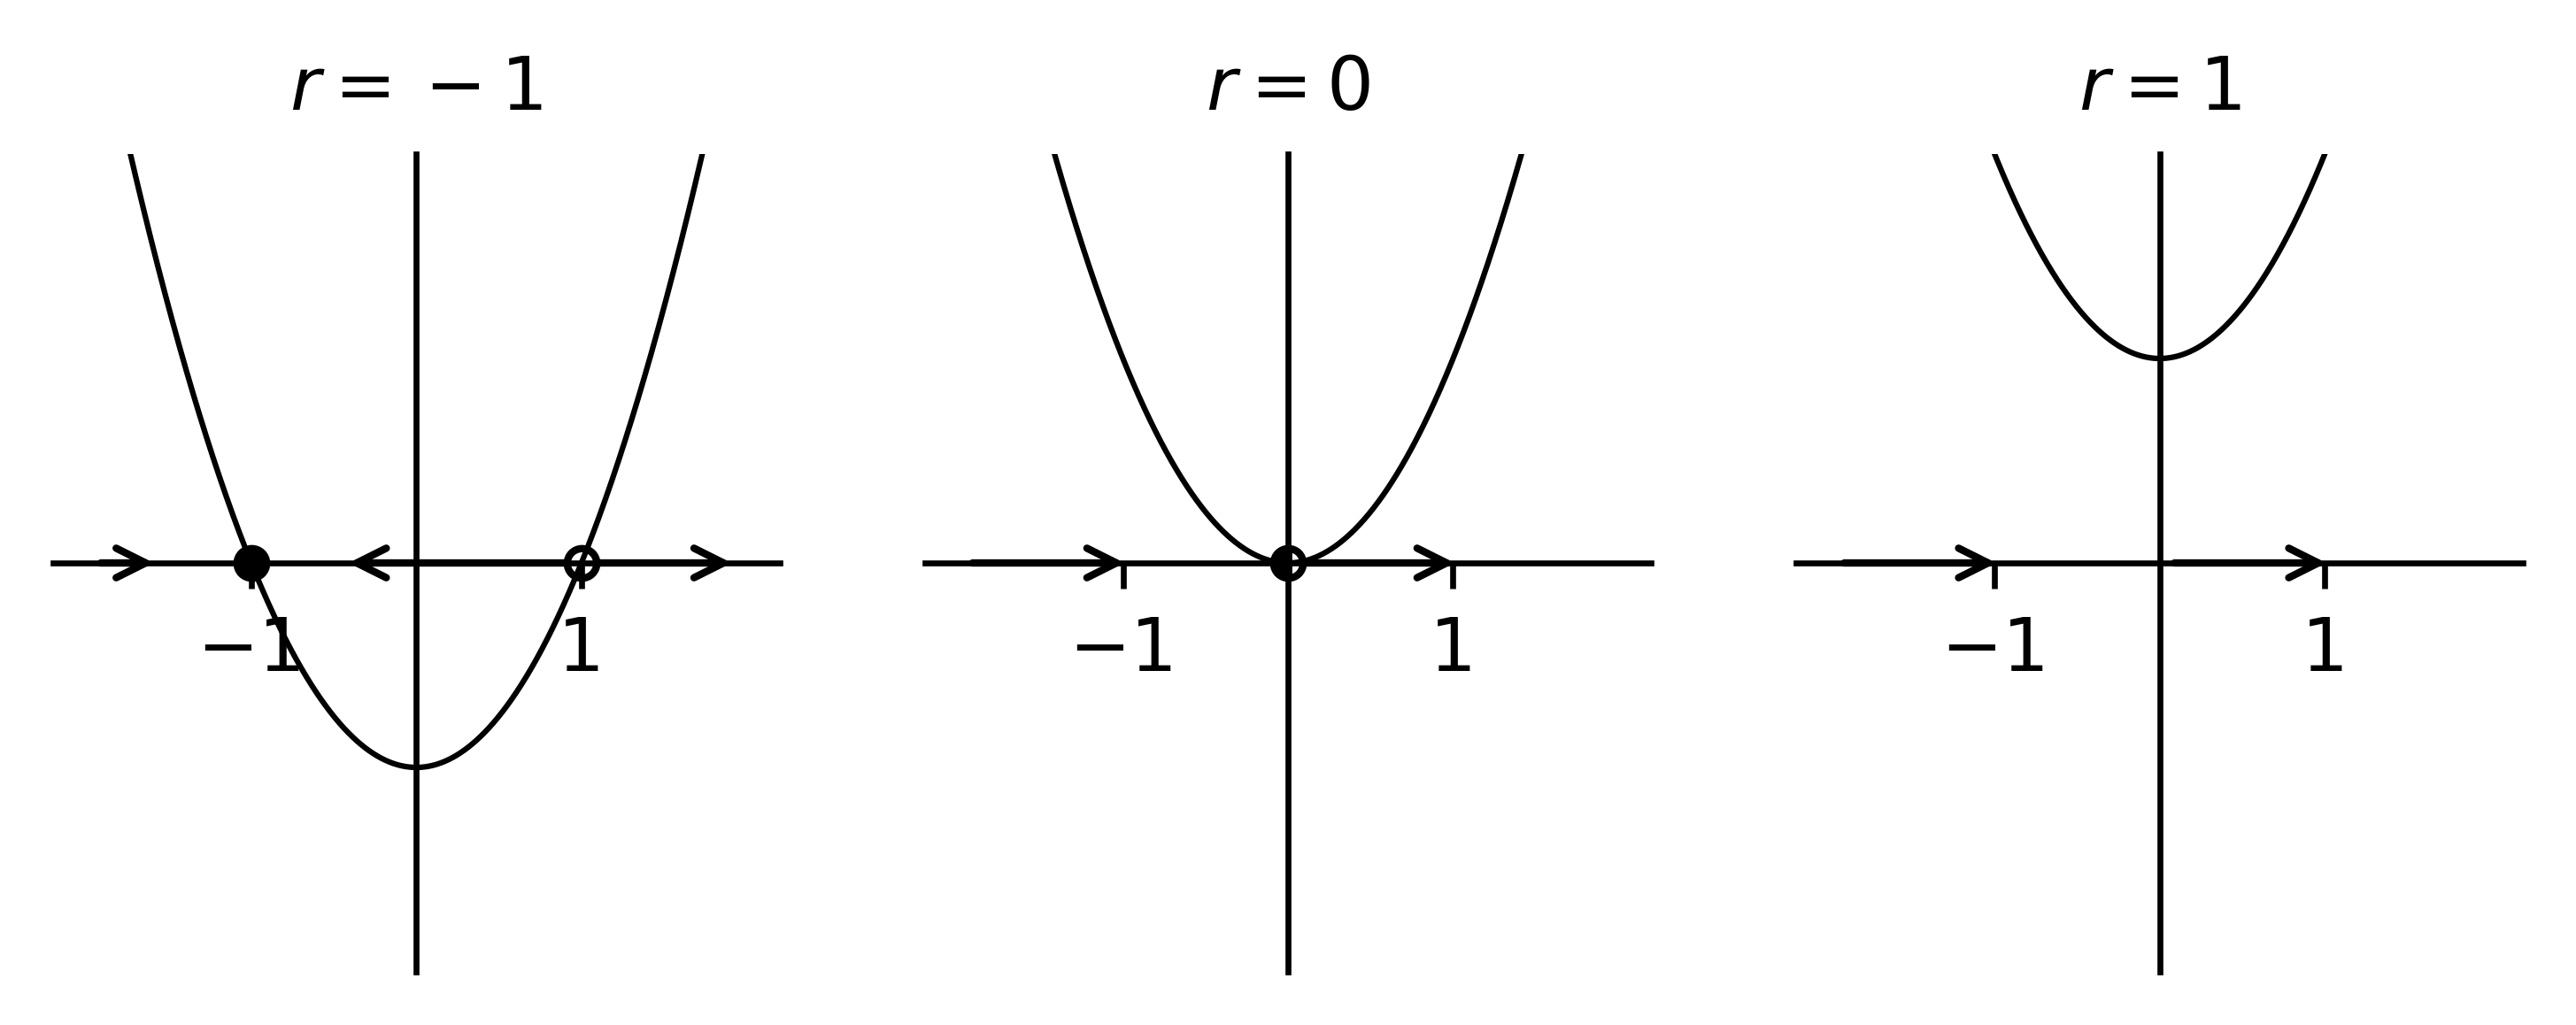

In [17]:
x = np.linspace(-2, 2, 1000)

# Saddle node normal form

def f(x, r):
    return r + x**2



x1, x2, x3 = f(x, -1), f(x, 0), f(x, 1)

# plot the 3 graphs on subfigures, all black colors, linewidth 0.75, no grid, no ticks, there should be a single x and y label for all subfigures, figure size should not be altered, dpi of 600, and the subfigures should be arranged in a single row
# 
fig, ax = plt.subplots(1, 3, sharey=True)

# set y limit for all subfigures
ax[0].set_ylim([-2, 2])
ax[1].set_ylim([-2, 2])
ax[2].set_ylim([-2, 2])


ax[0].plot(x, x1, color='k', linewidth=0.75)

ax[0].plot([-1], [0], 'ko', markersize=4)
ax[0].plot([1], [0], 'ko', markersize=4, fillstyle='none')

ax[0].set_title(r'$r=-1$', fontsize=10)

ax[0].set_xticks([-1, 1])
ax[0].set_yticks([])

ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('zero')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[0].annotate("", xy=(-1.5, 0), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", color='k'))
ax[0].annotate("", xy=(1, 0), xytext=(-0.5, 0), arrowprops=dict(arrowstyle="<-", color='k'))
ax[0].annotate("", xy=(2, 0), xytext=(1, 0), arrowprops=dict(arrowstyle="->", color='k'))



ax[1].plot(x, x2, color='k', linewidth=0.75)

ax[1].set_title(r'$r=0$', fontsize=10)

ax[1].set_xticks([-1, 1])

ax[1].spines['left'].set_position('center')
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[1].plot([0], [0], 'ko', markersize=4, fillstyle='left')

ax[1].annotate("", xy=(-0.9, 0), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", color='k'))
ax[1].annotate("", xy=(1.1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='k'))


ax[2].plot(x, x3, color='k', linewidth=0.75)

ax[2].set_title(r'$r=1$', fontsize=10)

ax[2].set_xticks([-1, 1])

ax[2].spines['left'].set_position('center')
ax[2].spines['bottom'].set_position('zero')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[2].annotate("", xy=(-0.9, 0), xytext=(-2, 0), arrowprops=dict(arrowstyle="->", color='k'))
ax[2].annotate("", xy=(1.1, 0), xytext=(0, 0), arrowprops=dict(arrowstyle="->", color='k'))

plt.rcParams["figure.dpi"] = 600
plt.rcParams["figure.figsize"] = (6,2)
plt.show()

Testing some bifurcation plotting code

In [18]:
def bifurcation_plot(f,f_x,r,x,rlabel='r'):
    """ produce a bifurcation diagram for a function f(r,x) given
        f and its partial derivative f_x(r,x) over a domain given by numpy arrays r and x
        
        f(r,x)  :  RHS function of autonomous ode dx/dt = f(r,x)
        f_x(r,x):  partial derivative of f with respect to x
        r       :  numpy array giving r coordinates of domain
        x       :  numpy array giving x coordinates of domain
        rlabel  :  string for x axis parameter label
    """
    # set up a mesh grid and extract the 0 level set of f
    R,X = np.meshgrid(r,x)
    plt.figure()
    CS = plt.contour(R,X,f(R,X),[0],colors='k')
    plt.clf()

    # reset rcParams to default values
    plt.rcParams.update(plt.rcParamsDefault)
    plt.rcParams["figure.dpi"]=600
    
    c0 = CS.collections[0]
    # for each path in the contour extract vertices and mask by the sign of df/dx
    for path in c0.get_paths():
        vertices = path.vertices
        vr = vertices[:,0]
        vx = vertices[:,1]
        mask = np.sign(f_x(vr,vx))
        stable = mask < 0.
        unstable = mask > 0.
        
        # plot the stable and unstable branches for each path
        plt.plot(vr[stable],vx[stable],'b')
        # plt.hold(True)
        plt.plot(vr[unstable],vx[unstable],'r--')
        
    plt.ylabel(r'$r$', rotation=0)
    plt.xlabel(r'$x$')

    # Move xlabel to the left of the figure above axis, move ylabel to the top of the y-axis
    ax = plt.gca()
    ax.xaxis.set_label_position('top')
    ax.yaxis.set_label_position('right')
 

    plt.legend(('stable','unstable'),loc='best')

    # remove top and right spines, center left spine, 0 bottom spine
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    
    # remove x ticks and y ticks
    plt.xticks([])
    plt.yticks([])

    plt.xlim(r[0],r[-1])
    plt.ylim(x[0],x[-1])
    plt.show()

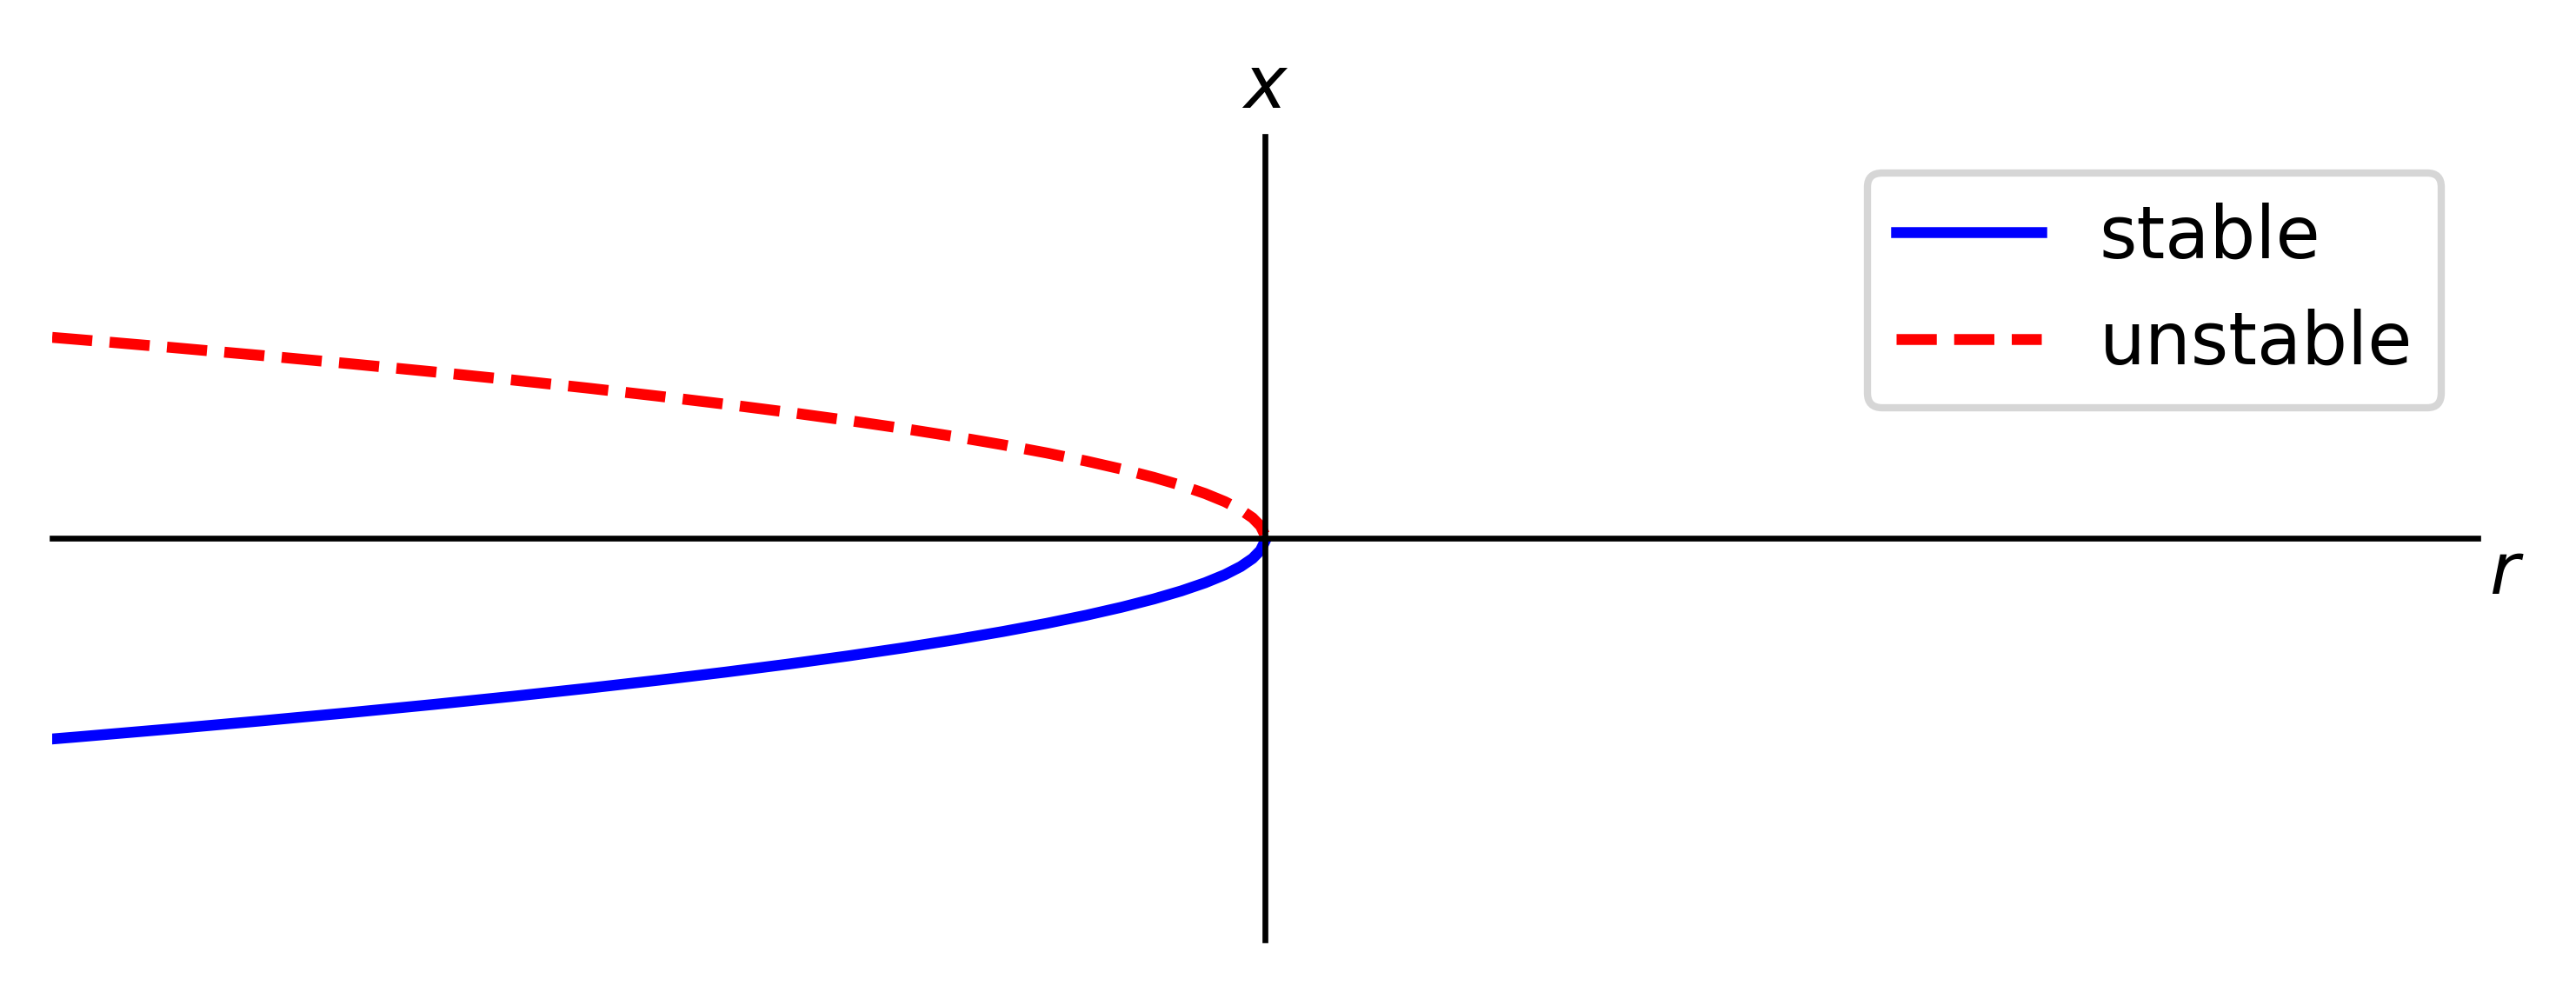

In [19]:
f = lambda r,x: r + x*x
f_x = lambda r,x: 2.*x

x = np.linspace(-4,4,100)
r = np.linspace(-4,4,100)

bifurcation_plot(f,f_x,r,x)

### Transcritical bifurcation

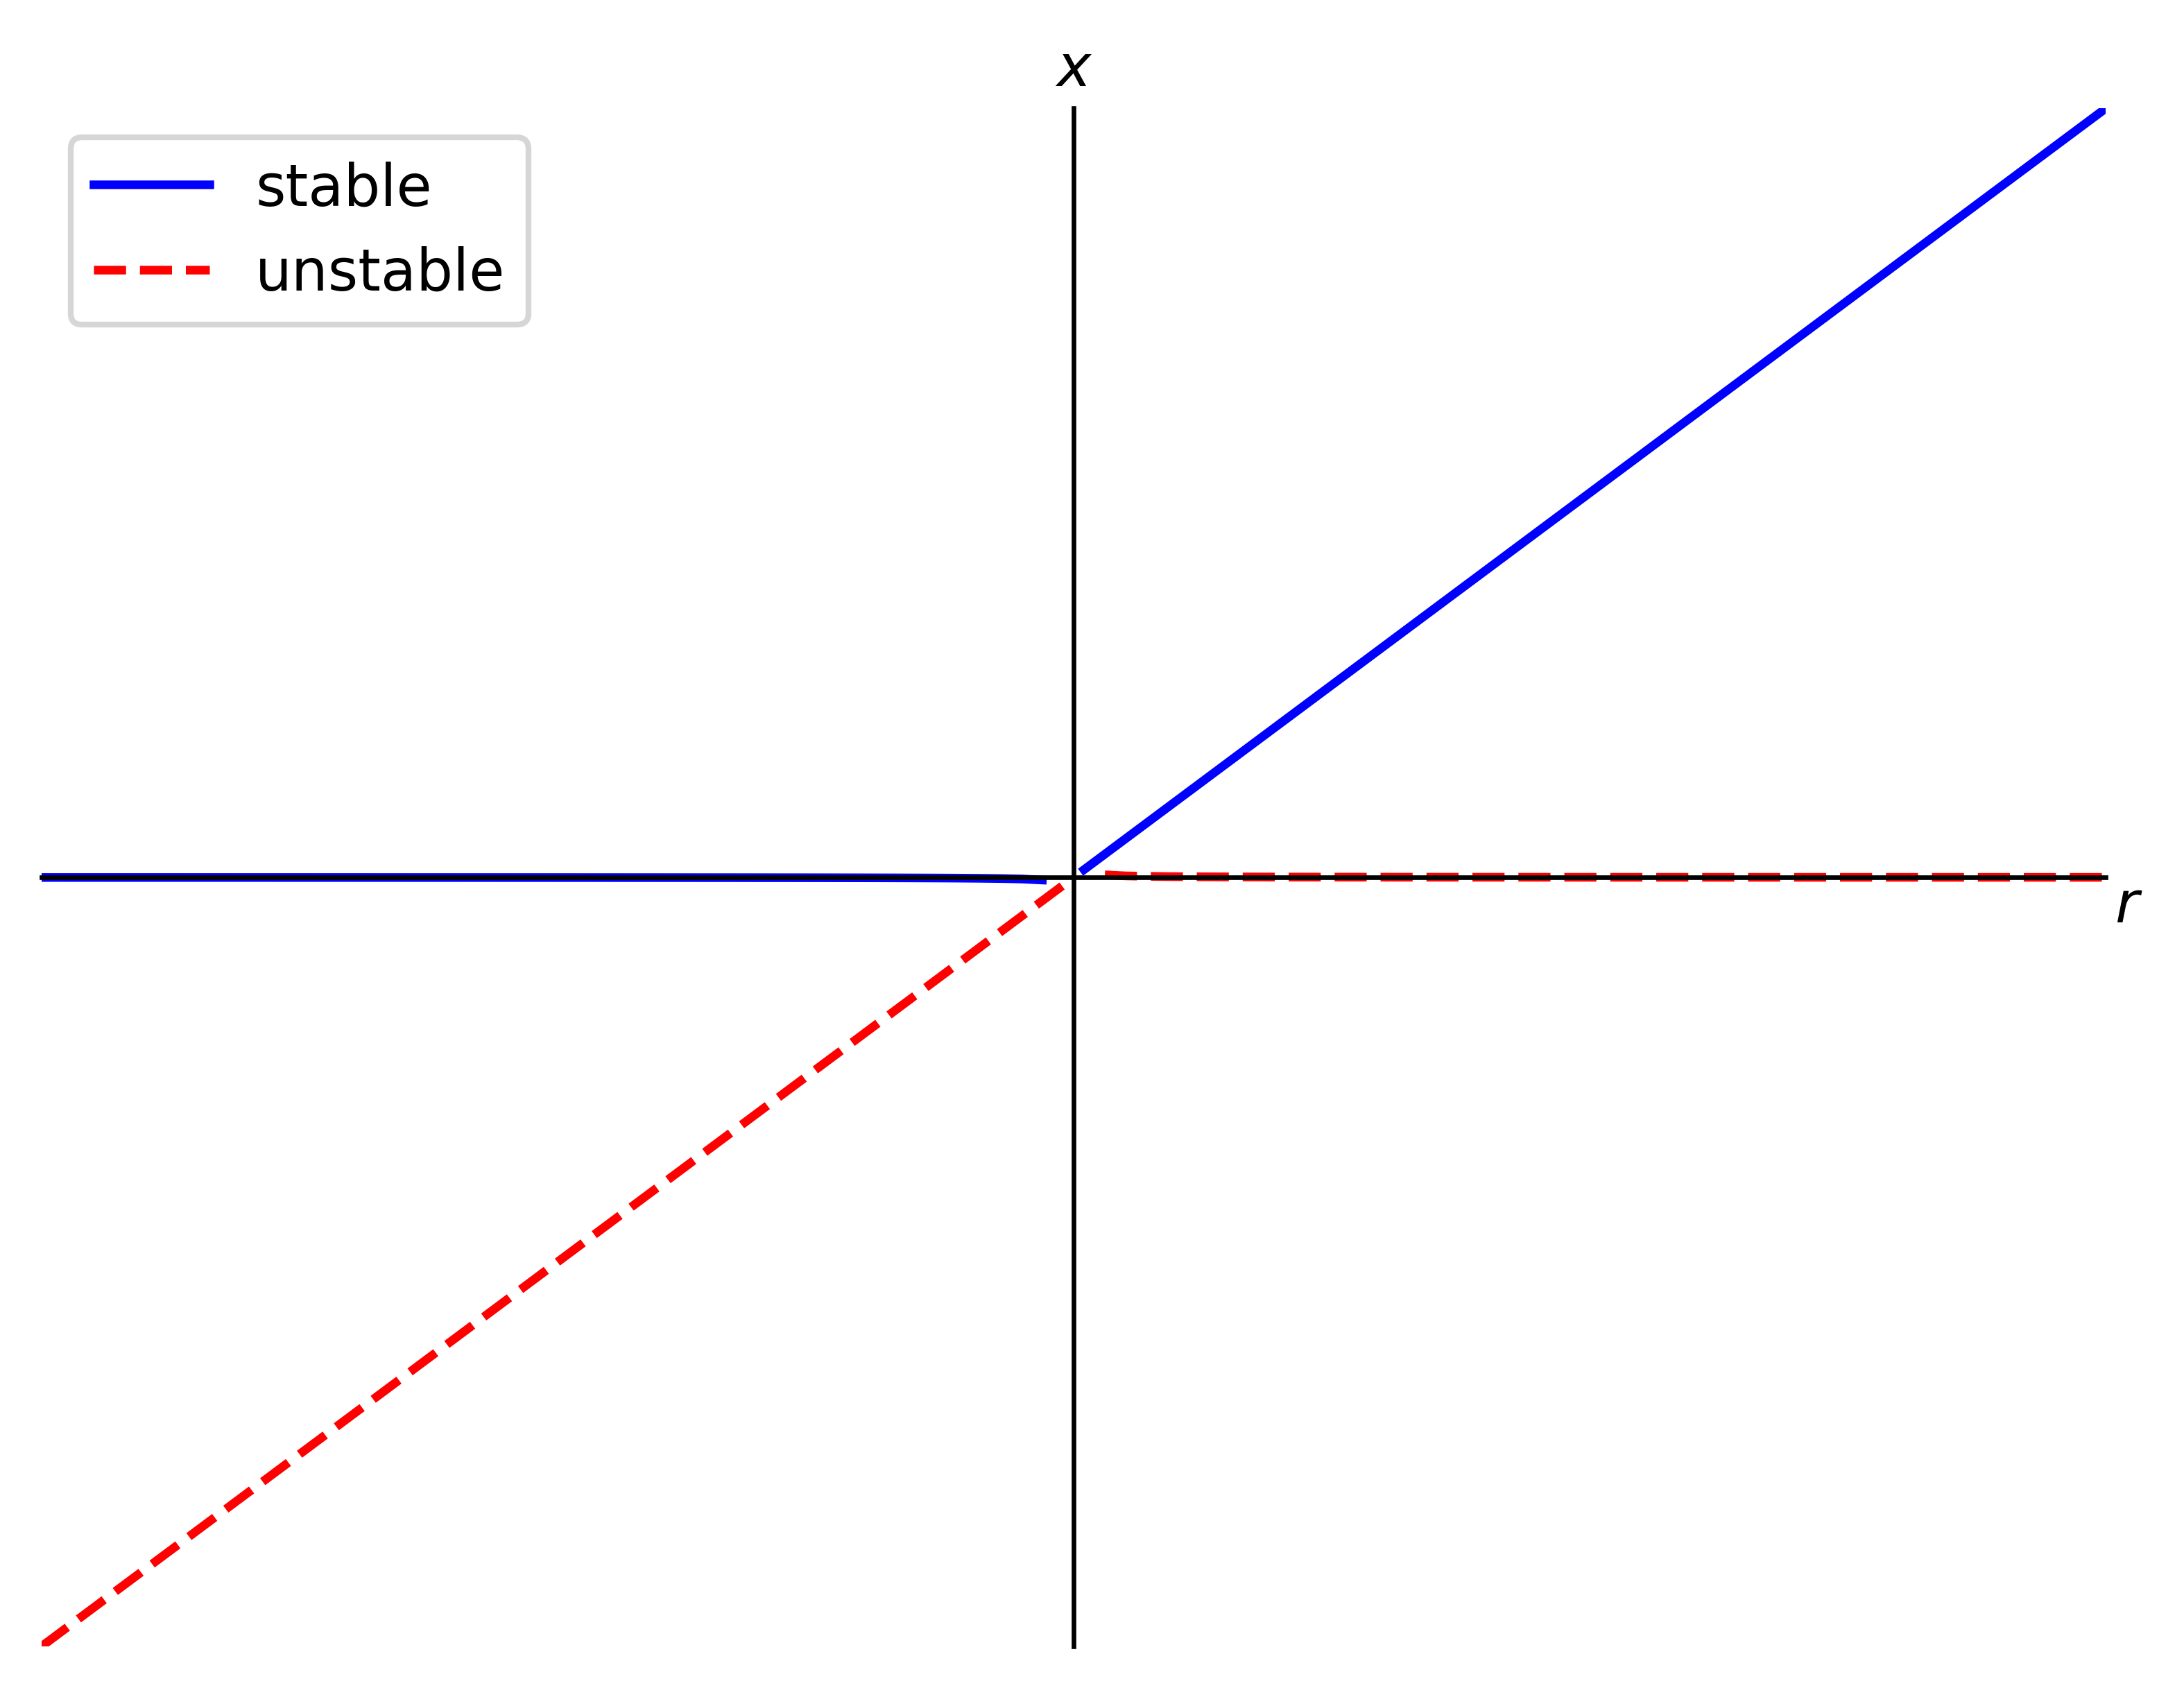

In [20]:
f = lambda r,x: r*x -  x*x
f_x = lambda r,x: r - 2.*x

x = np.linspace(-1.,1.,100)
r = np.linspace(-1.,1.,100)

bifurcation_plot(f,f_x,r,x)

### Super-critical pitchfork bifurcation

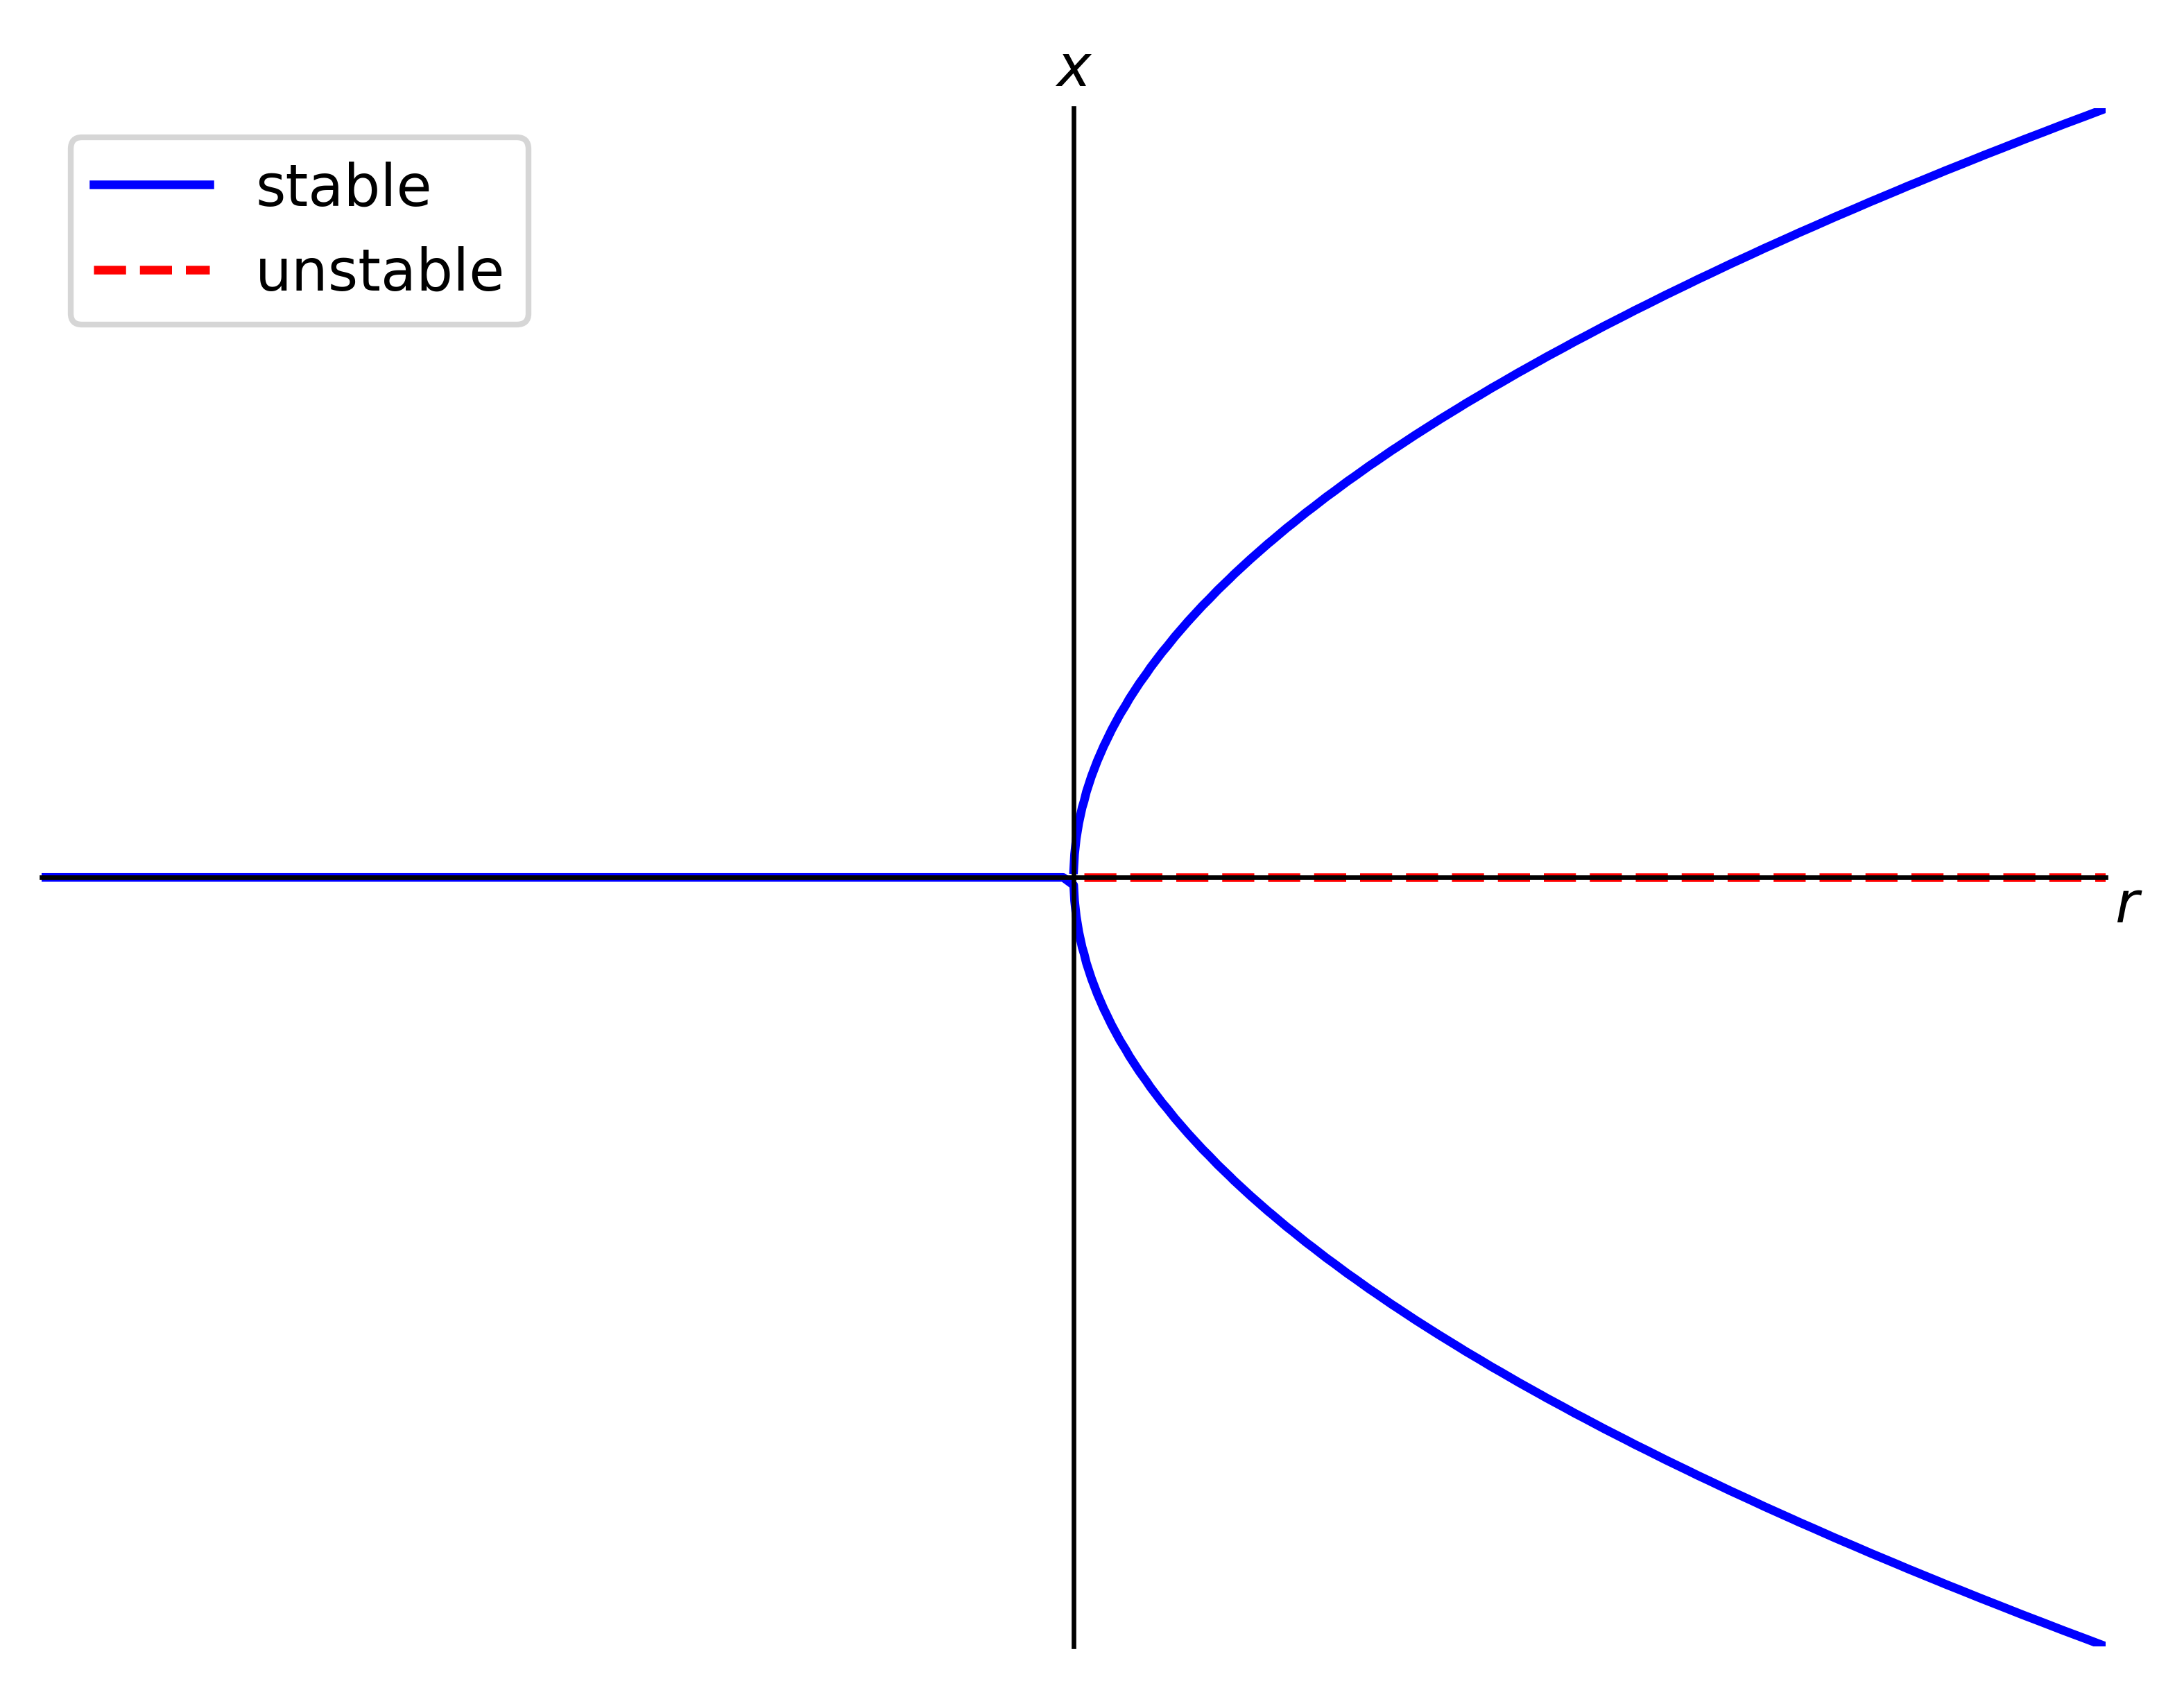

In [21]:
f = lambda r,x: r*x -  x**3
f_x = lambda r,x: r - 3.*x**2

x = np.linspace(-1.,1.,100)
r = np.linspace(-1.,1.,100)

bifurcation_plot(f,f_x,r,x)

### sub-critical pitchfork bifurcation

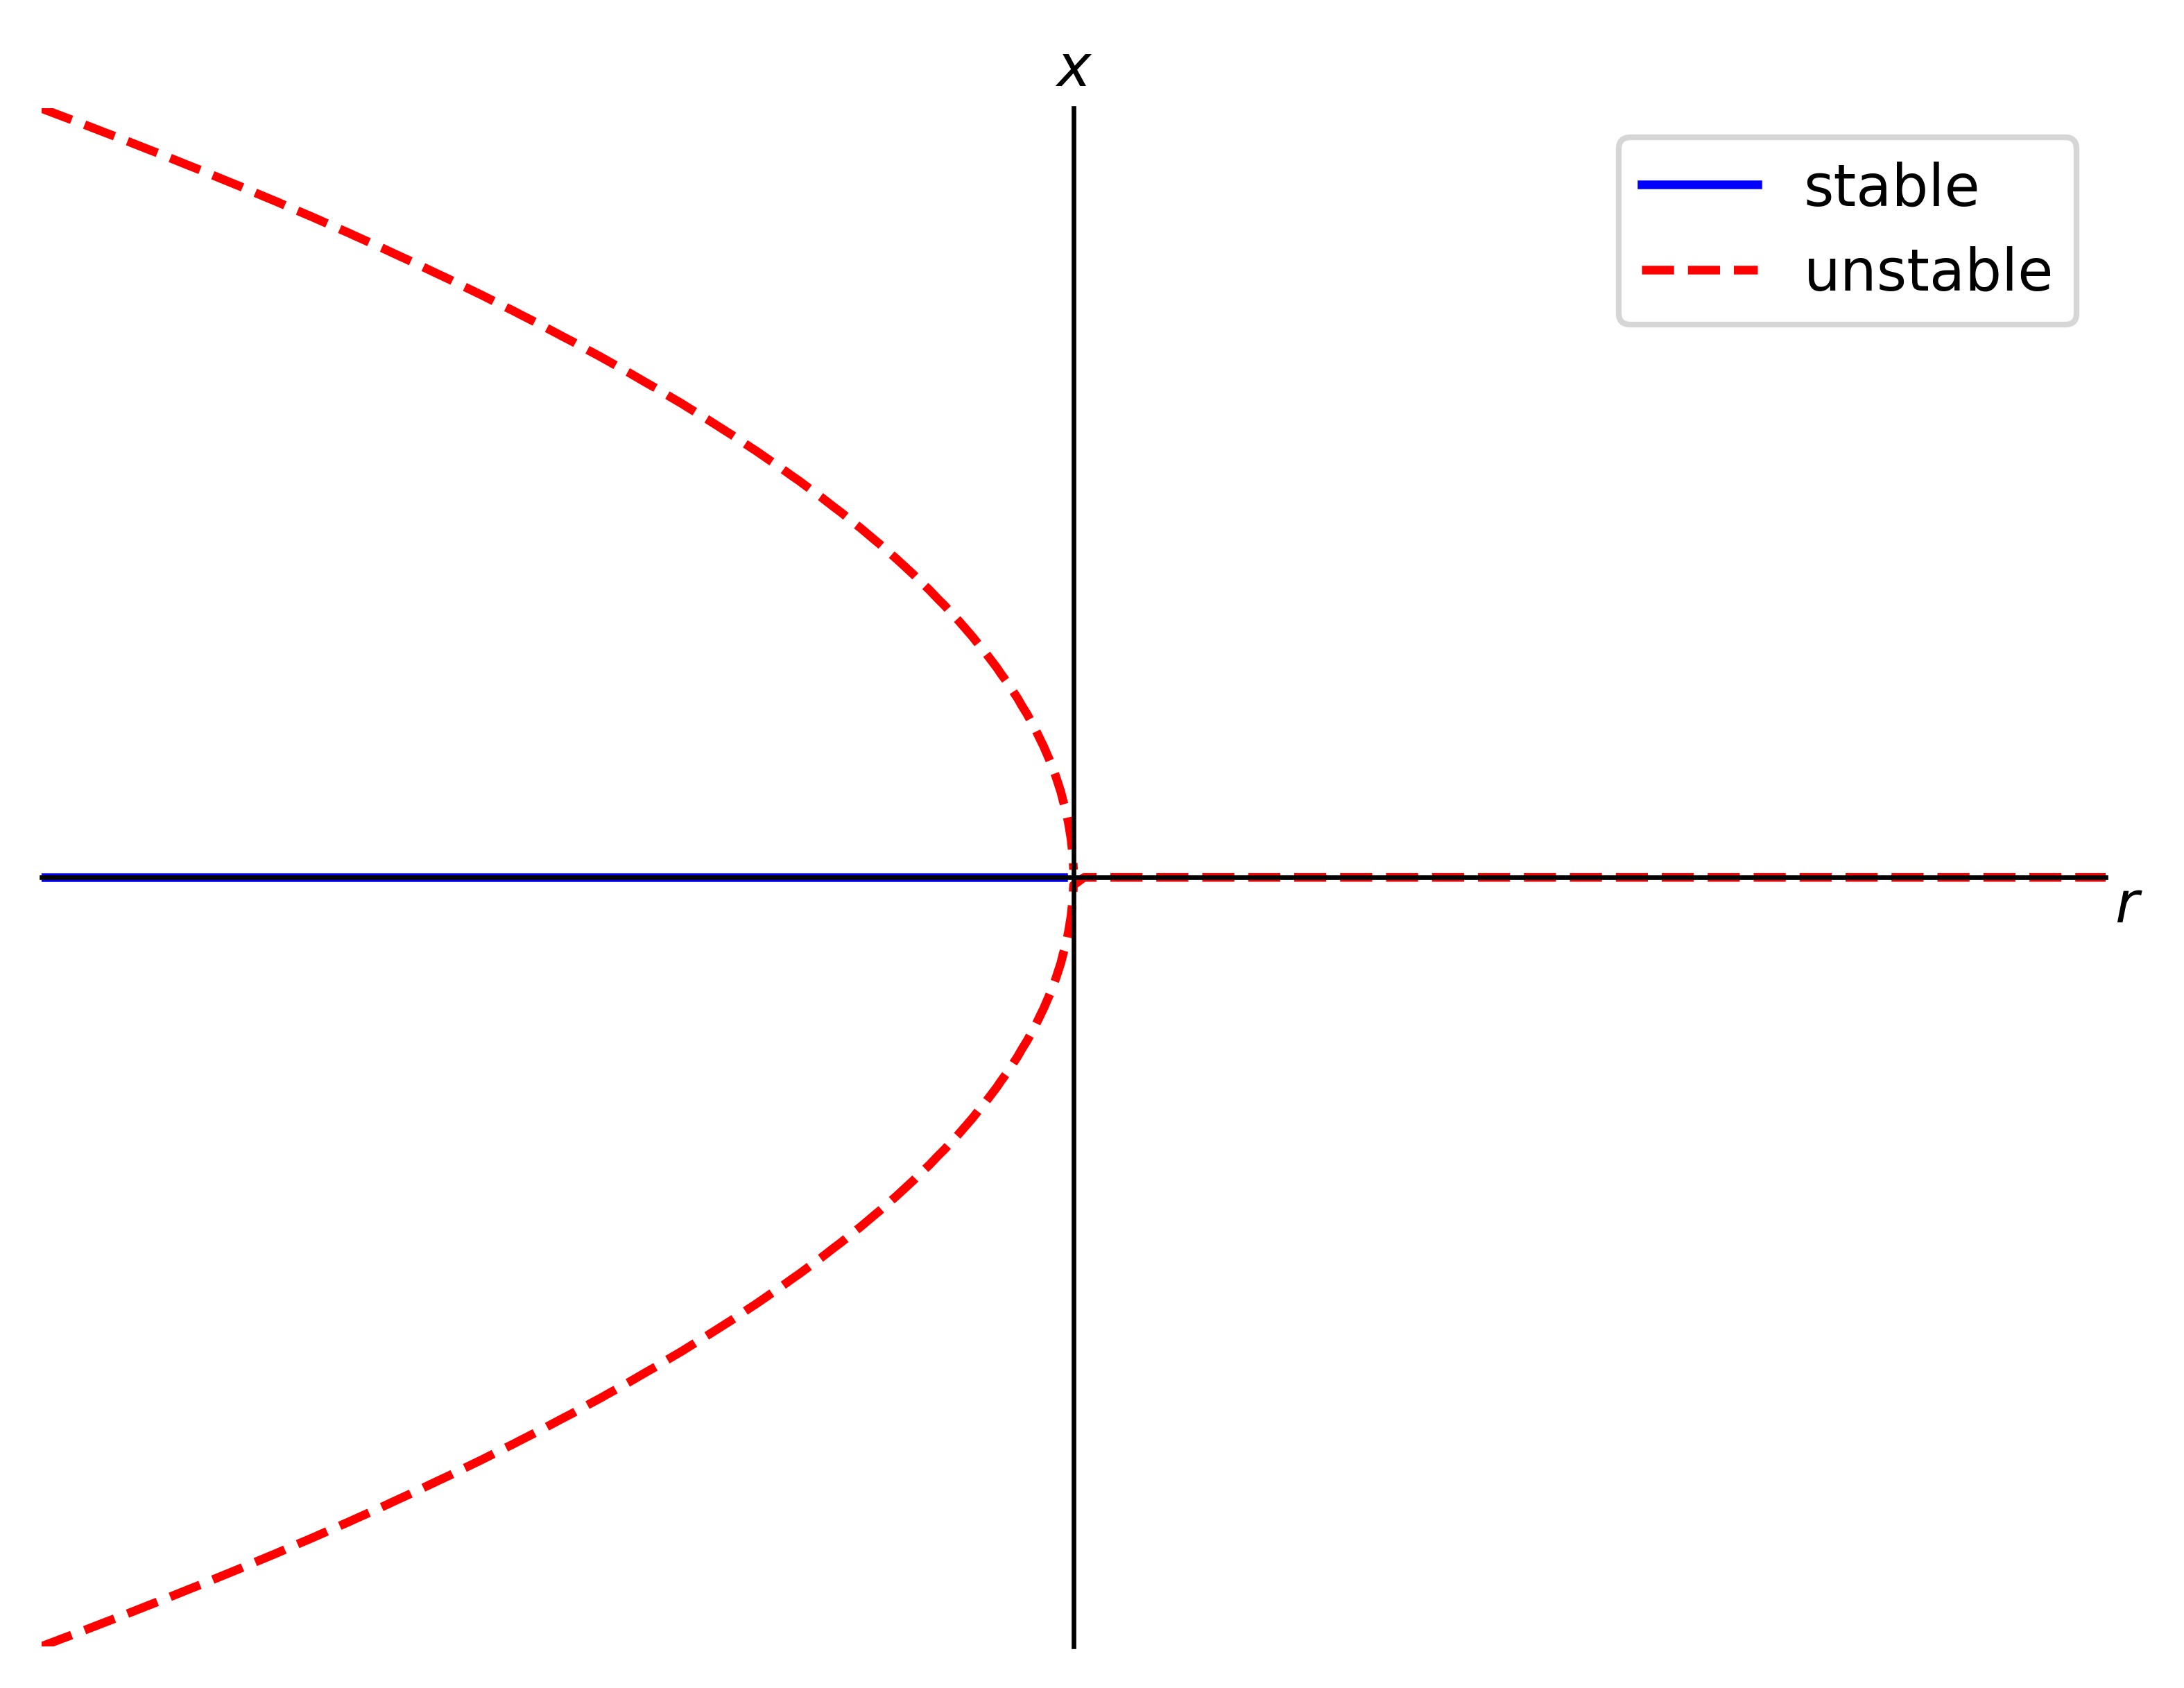

In [23]:
f = lambda r,x: r*x +  x**3
f_x = lambda r,x: r + 3.*x**2

x = np.linspace(-1.,1.,100)
r = np.linspace(-1.,1.,100)

bifurcation_plot(f,f_x,r,x)